# Weighted Set Cover: Randomized LP Rounding Scheme vs ILP

## Implementation
Notice that all the implementation details are abstracted away in set_cover.py. Here, we are able to interact with the SetCover object imported from set_cover.py which has two convenient methods solveILP() and solveLP_Rounding() that we can interact with. Both take in a dataset that contains the set cover problem. The dataset should be of the format m (number of elements), n (number of sets), the cost of each set c(i) where i = 1...n, and for each element j = 1...m the number of sets that cover element j as well as the sets that cover j. Note that in our implementation, for ease, we often use 0-indexing for storage and switch to 1-indexing when interacting with the data. All of this is abstracted away however.

## Toy Problem 
We first test out our example with a toy example constructed with 4 elements and 10 sets. We first load the data and print the data as well to verify that it is loaded correctly. Then, we run our LP_Rounding scheme as well as our ILP

In [1]:
from set_cover import SetCover
solver = SetCover('datasets/test.txt', printData=True)

m is 4
n is 10
[10000, 1, 2, 3, 4, 5, 6, 6, 7, 8]
[[1, 8, 4, 7, 9], [8, 6, 9, 1, 2], [1, 3, 2, 4, 9, 5, 6], [1, 3]]


In [2]:
solver.solveLP_Rounding()

(0.0008411279995925725, 6)

In [3]:
solver.solveILP()

(0.0017496770001343975, 6)

Notice here that the ILP solver indeed gets the correct optimal set cover weight of our toy problem which is 6. The LP Rounding scheme gets 6, which is surprisingly the same result. Notice also that the LP Rounding scheme is significantly faster than the ILP solver, which is expected.

Now, we begin our experimentation on the datasets that we have acquired (check the readme for more detailed information about the source). The datasets are roughly divided into 8 categories, differentiated by the number of rows / columns (number of elements and sets) as well as density (how many uncovered elements a set covers) as well as K (the range of weights). Each category is labeled as a different problem set, and the details are in the table below. 

![Exhibit 1: The characteristics of different datasets](set_cover_table.png)

With that being said, let us run our experiments on a sample problem set! Note that based on previous trial runs, the ILP did not finish for a lot of these datasets. As such, we will limit the time of the ILP method to 1.5 times that of the LP Rounding Scheme. The optimal times are from the paper that the dataset is from.

LP Values: [429, 512, 516, 494, 512, 692, 430, 676, 1130, 545]
ILP values: [478, 568, 568, 531, 528, 629, 447, 513, 719, 571]
Optimal Values: [429, 512, 516, 494, 512, 560, 430, 492, 641, 514]


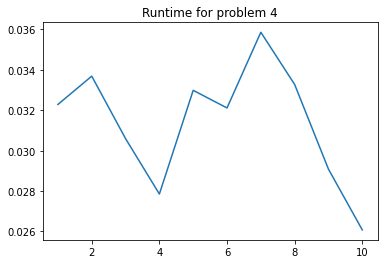

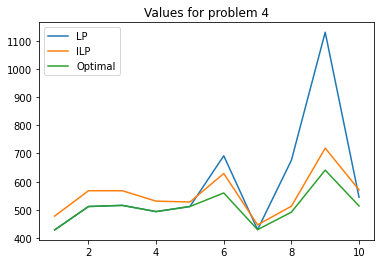

In [4]:
from matplotlib import pyplot as plt
def runExperiment(numberOfDatasets, performanceOptimal, problemNumber):
    runtimes = []
    indices = list(range(1, numberOfDatasets + 1))
    performanceLP = []
    performanceILP = []
    for i in indices:
        solver = SetCover(f'datasets/problem_{problemNumber}/scp{problemNumber}{i}.txt')
        (time, lp) = solver.solveLP_Rounding()
        (_, ilp) = solver.solveILP(timeLimit = time)
        performanceLP.append(lp)
        performanceILP.append(ilp)
        runtimes.append(time)
    performances = [(performanceLP[j], performanceILP[j], performanceOptimal[j]) for j in range(numberOfDatasets)]
    f = plt.figure(1)
    plt.title(f'Runtime for problem {problemNumber}')
    plt.plot(indices, runtimes)
    f.show()
    g = plt.figure(2)
    plt.plot(indices, performances)
    plt.title(f'Values for problem {problemNumber}')
    plt.legend(['LP', 'ILP', 'Optimal'], loc ='upper left') 
    g.show()
    print(f'LP Values: {performanceLP}')
    print(f'ILP values: {performanceILP}')
    print(f'Optimal Values: {performanceOptimal}')

performanceOptimal = [429, 512, 516, 494, 512, 560, 430, 492, 641, 514]
runExperiment(10, performanceOptimal, 4)

We are able to get some pretty good results from problem set 4! Notice that the LP Rounding scheme gives a very exact approximation for the first 5 datasets in problem 4 as well as the 7th. It gives a very good approximation for dataset number 10 as well, but on the other hand, it gives horrible approximations for dataset 6, 8, and 9 (it is still however within our approximation bound of log n, which in this case is log 200--approximately 5). The ILP scheme, on the other hand, gives a close enough proxy for the results consistently (but never gives an exact answer). This is because solving the problem exactly will require a lot more time, but the ILP still gives enough of a consistently good approximation. 

Therefore, we see that our experimentation conforms to the theoretical results that are proven elsewhere (the approximation ratio as well as the runtimes). In practice, it may be good to do what we have done (set a time limit for the ILP and take the min value of the two schemes) as they have varying strengths for varying datasets (the ILP gives a consistent performance that is always approximated whereas the LP will sometimes give exact approximations and sometimes really bad approximations). 

As for next steps, we are curious to see what the experiments will be like in other instances of the problem (larger instances) where the ILP may not be able to provide such good approximations in time slightly more than the LP Rounding scheme. In addition, due to the shortage of time we were unable to run the experiments on other instances of the problem provided in the paper. That would be a good source of continued experimentation as well.  